In [1]:
#Imports Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Load the dataset
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


In [4]:
# Finding the name of the columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Finding the data types of the column
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
#Finding number of rows and columns
df.shape

(41188, 21)

In [7]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('---'*10)

age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
------------------------------
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------------------------------
marital
['married' 'single' 'divorced' 'unknown']
------------------------------
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------------------------------
default
['no' 'unknown' 'yes']
------------------------------
housing
['no' 'yes' 'unknown']
------------------------------
loan
['no' 'yes' 'unknown']
------------------------------
contact
['telephone' 'cellular']
------------------------------
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'a

In [8]:
# cat stands for categorical value
cat = df[['job','marital','education','default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','poutcome','y']]

# num stands for numerical variable
num = df[['age','duration', 'campaign', 'pdays',
       'previous','emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [9]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [10]:
### categorical
category_cols = list(df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
# Finding Missing Value
df.isnull().sum()
# There is no missing value in the data set

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

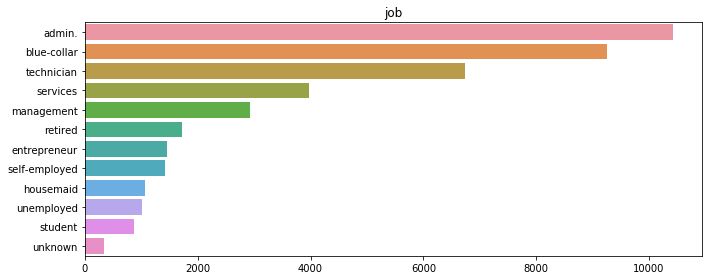

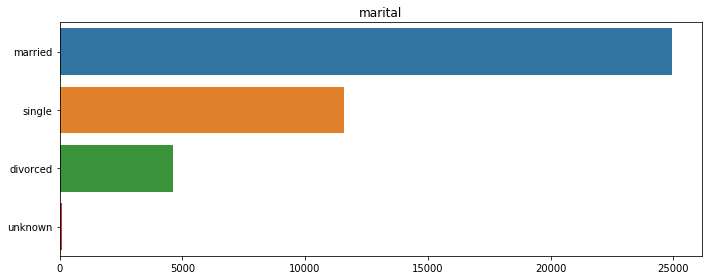

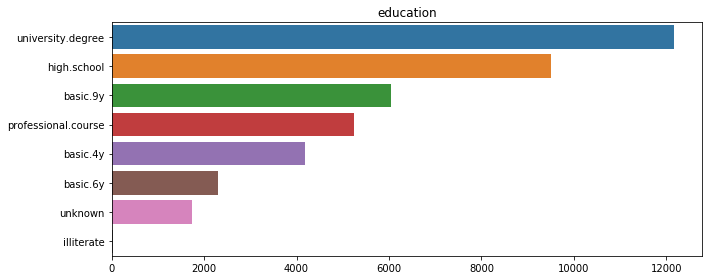

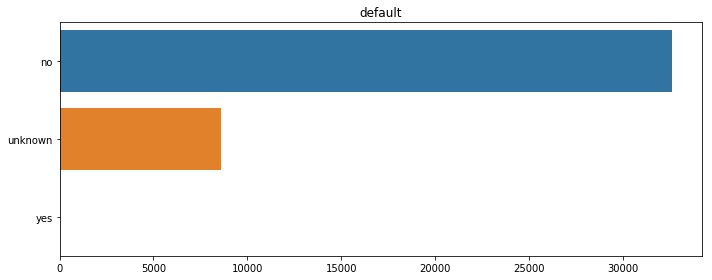

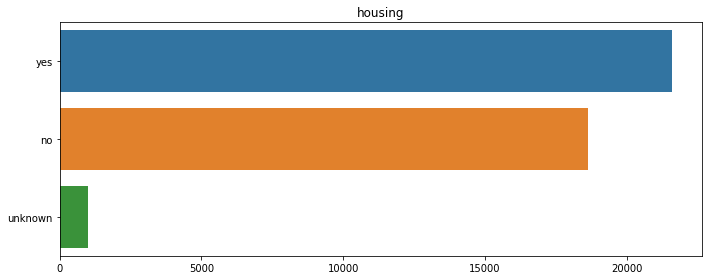

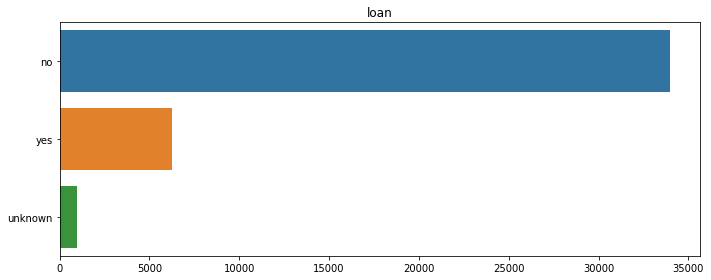

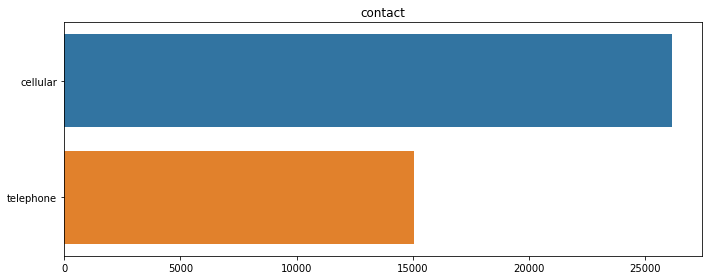

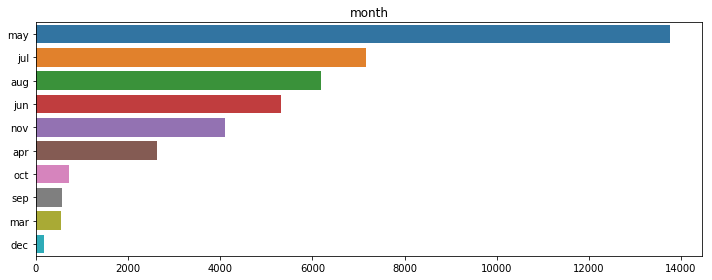

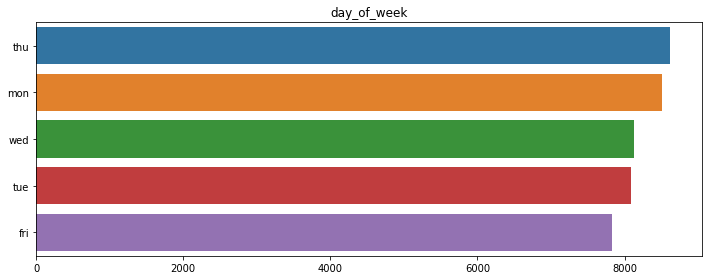

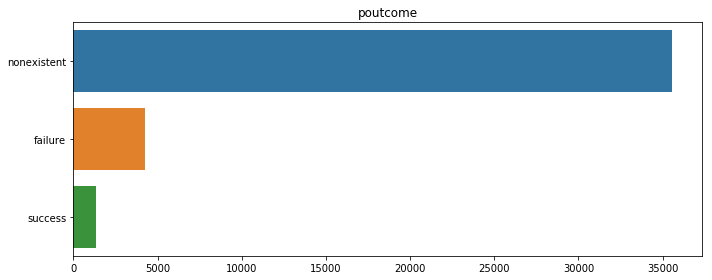

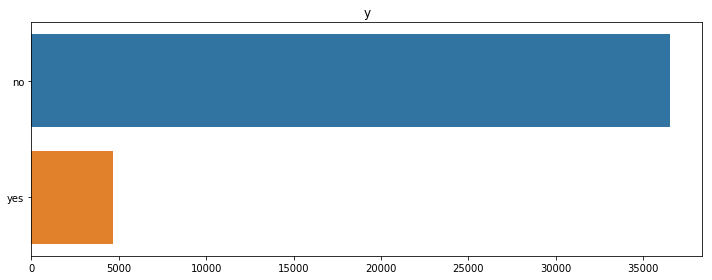

In [12]:
# Various Bar Graph of Categorical Variable
for col in category_cols:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

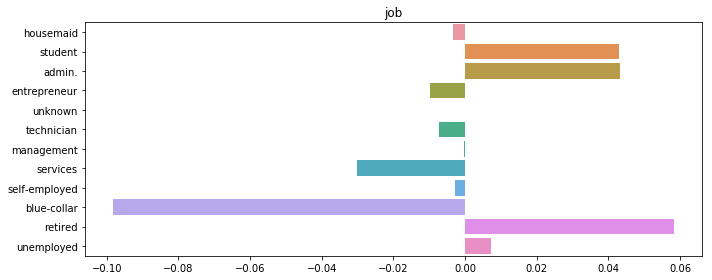

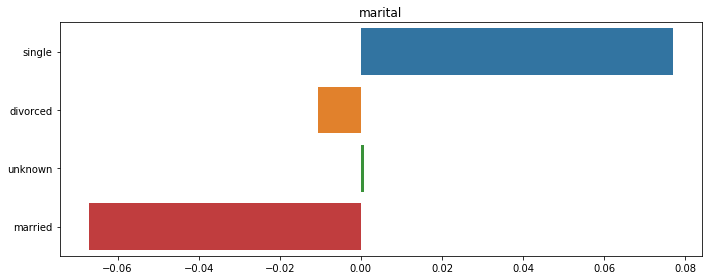

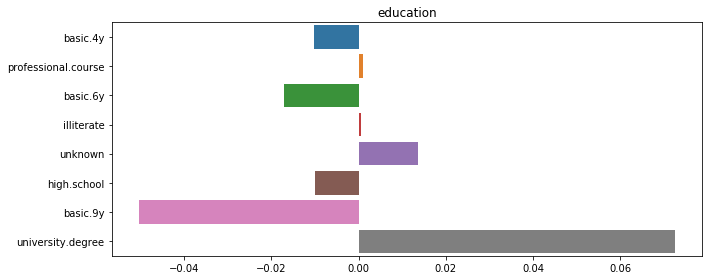

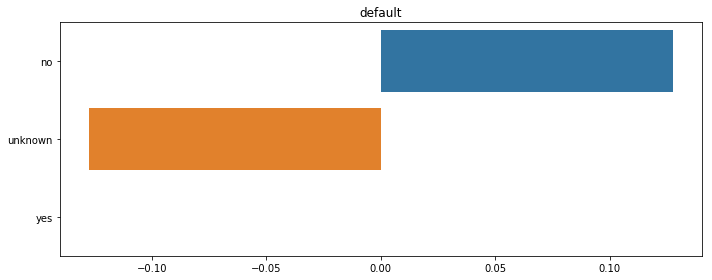

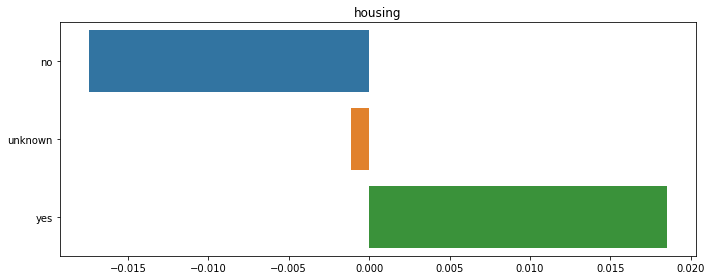

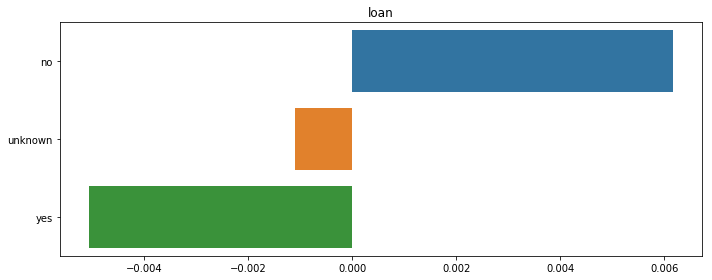

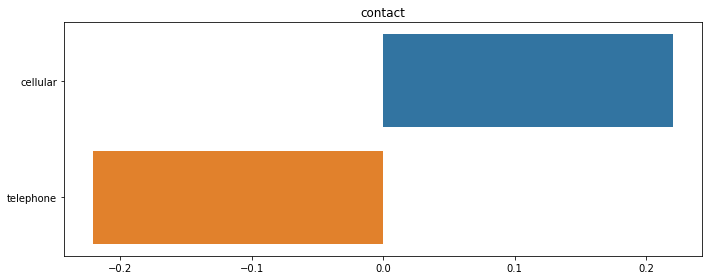

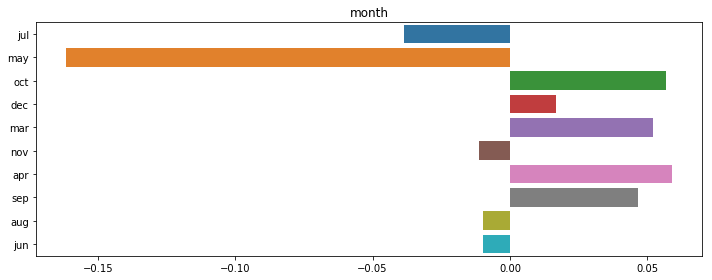

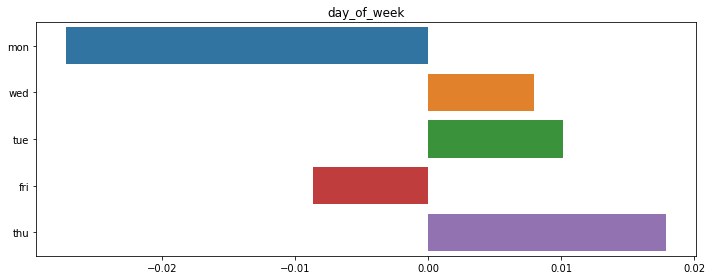

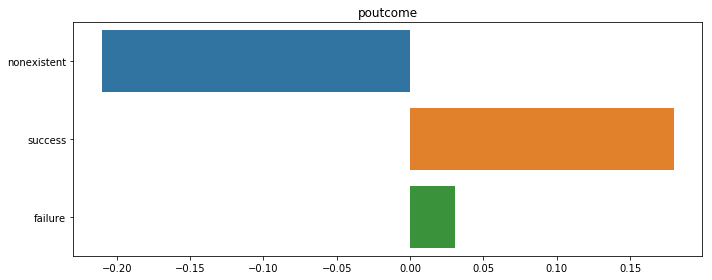

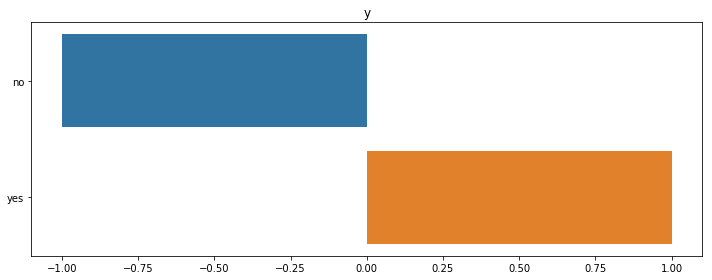

In [13]:
for col in category_cols:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

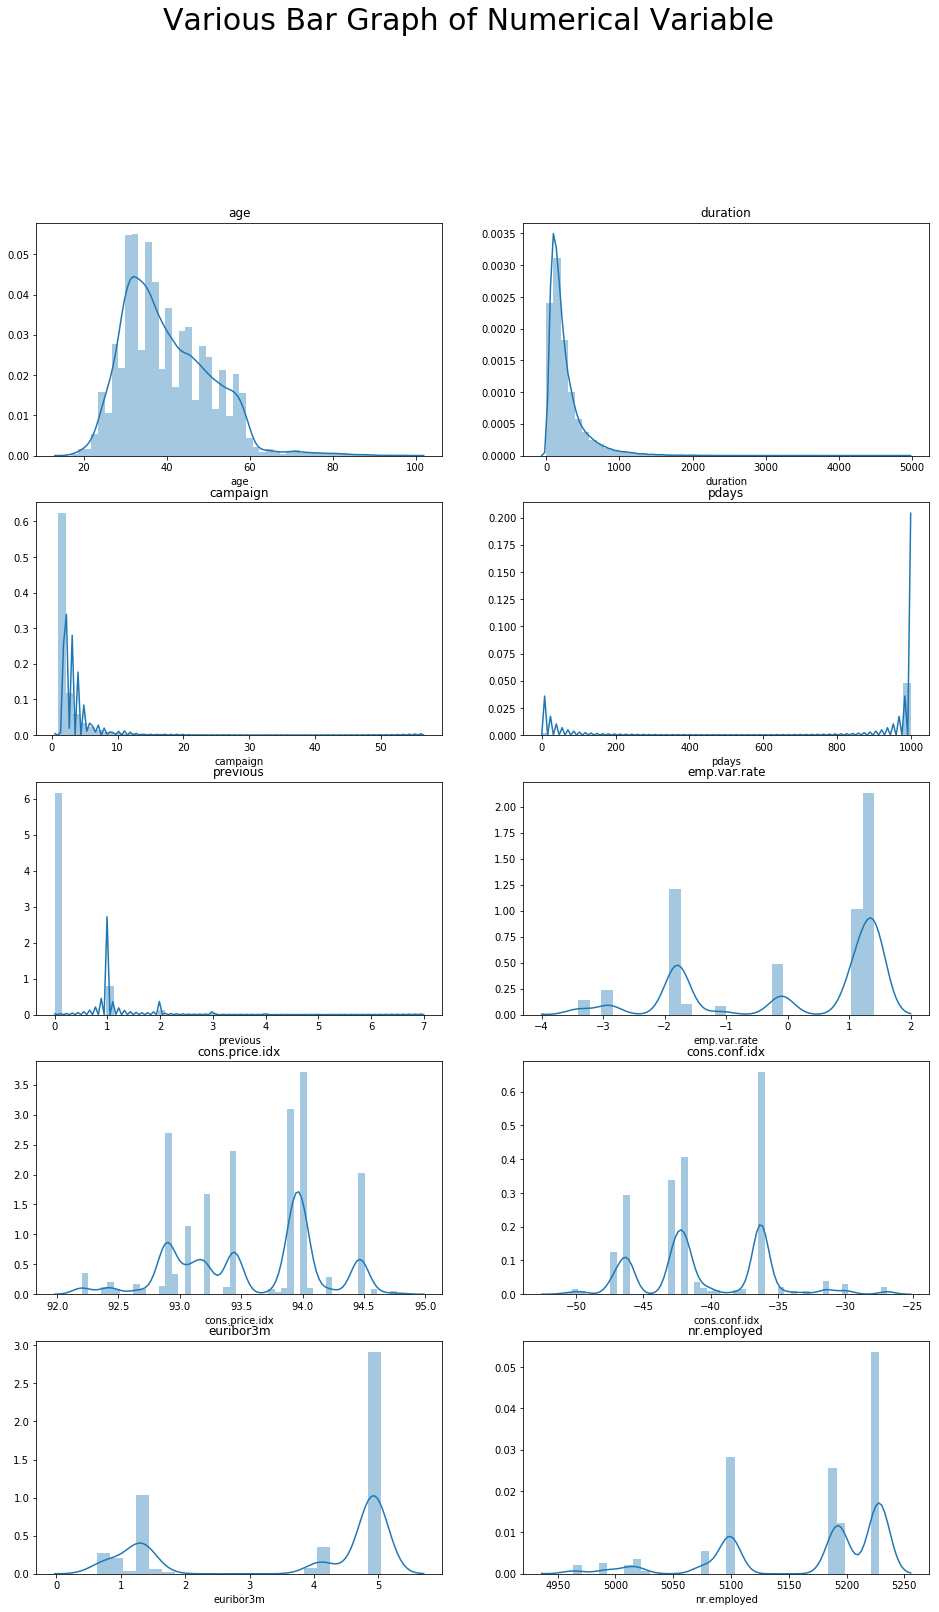

In [14]:
k=1
fig = plt.figure(figsize = (16,30))
fig.suptitle("Various Bar Graph of Numerical Variable",fontsize=30)
for i in num:
    plt.subplot(6,2,k)
    sns.distplot(df[i])
    plt.title(str(i))
    
    k +=1
plt.show()

In [15]:
# conisdering two variable and try to find out the insights
pd.crosstab(df.job,df.education)


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [16]:
# Correlation Ananlysis
corr = df.corr()

In [17]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


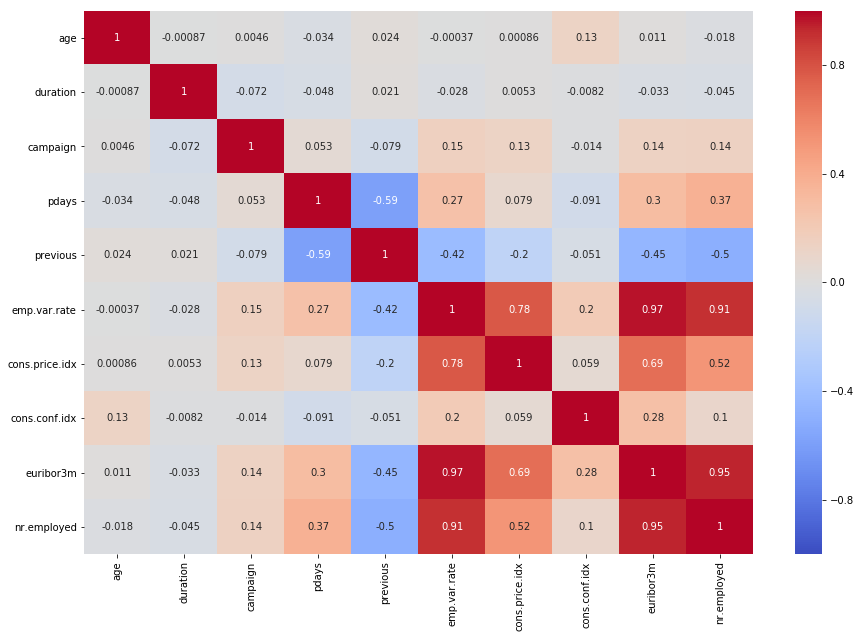

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)

In [19]:
df_dup = df[df.duplicated(keep="last")]
df_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [20]:
df_dup.shape

(12, 21)

In [21]:
df = df.drop_duplicates()
df.shape


(41176, 21)

In [22]:
# replacing differnet types of basic education with "basic"
df.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [23]:
# dropping some of the unimportant variable to increase the accuracy
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

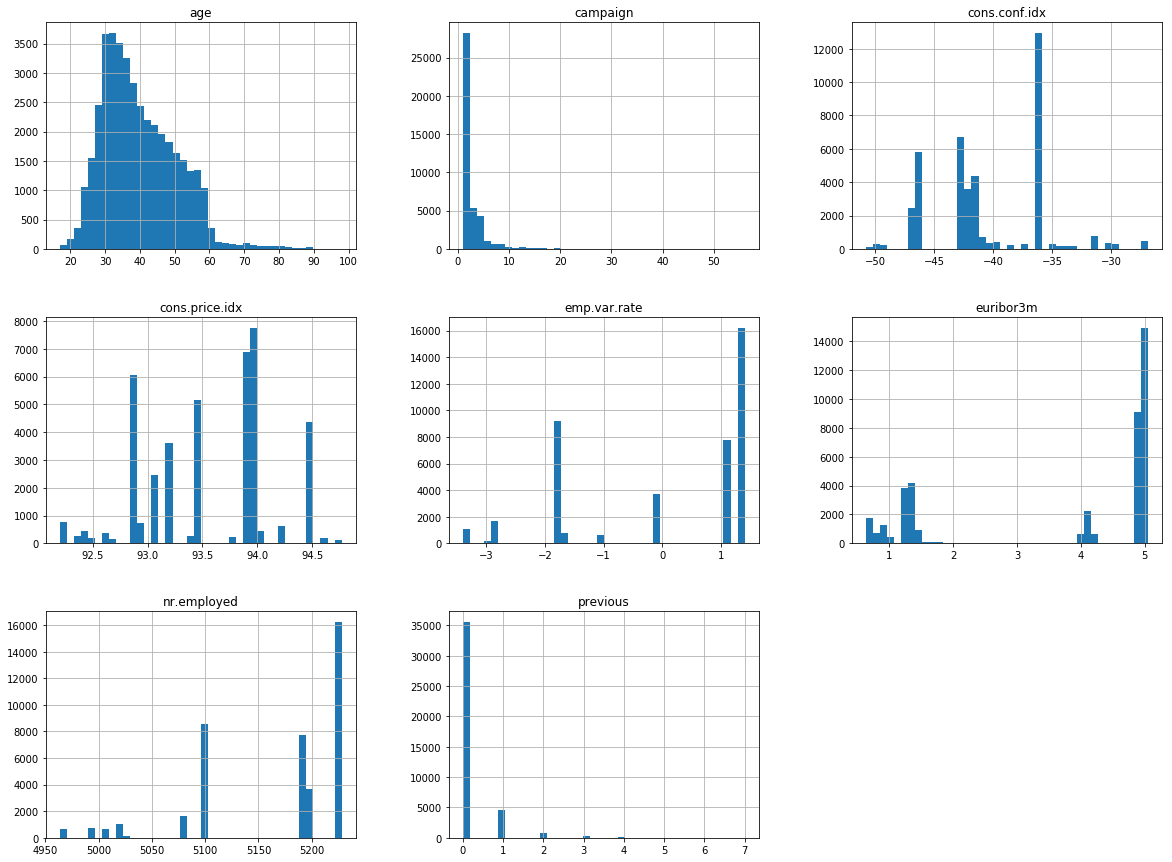

In [24]:
df.hist(bins=40,figsize=(20,15))
plt.show

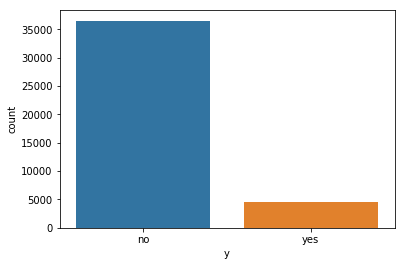

In [25]:
sns.countplot(df['y'])

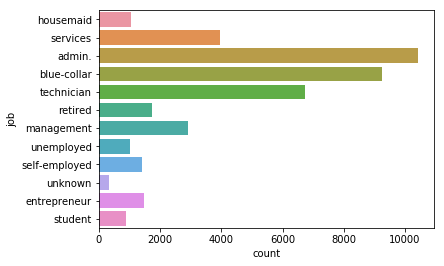

In [26]:
sns.countplot(y='job',data=df)

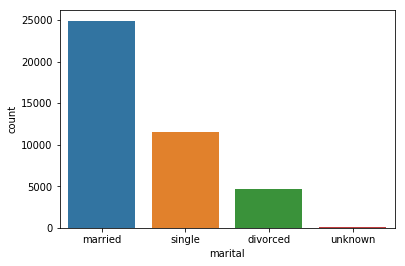

In [27]:
sns.countplot(df['marital'])

In [28]:
# Converting Categorical variable into numeric using Label Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [29]:
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [30]:
df.y = le.fit_transform(df.y)

In [31]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [32]:
x=df.drop('y',axis=1)
y=df['y']

In [33]:
# Train and Test split
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_train.shape, y_train.shape

((32940, 14), (32940,))

In [36]:
x_test.shape, y_test.shape

((8236, 14), (8236,))

In [37]:
# Building Predictive Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
LR=LogisticRegression(max_iter=1000)
Dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=10)
clf = SVC(kernel='rbf', gamma='auto')

def accuracy (a,b,c,d):
    for every in (a,b,c,d):
        every.fit(x_train,y_train)
        print(every.__class__.__name__,'accuracy_score=',accuracy_score(y_test,every.predict(x_test)))
accuracy(LR,Dtree,rfc,clf)

C:\Users\bansa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression accuracy_score= 0.8949732880038854
DecisionTreeClassifier accuracy_score= 0.8442204953861098
RandomForestClassifier accuracy_score= 0.8863525983487129
SVC accuracy_score= 0.8870811073336571


In [39]:
from sklearn.metrics import classification_report
yhat = LR.predict(x_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7269
           1       0.76      0.15      0.26       967

   micro avg       0.89      0.89      0.89      8236
   macro avg       0.83      0.57      0.60      8236
weighted avg       0.88      0.89      0.86      8236



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhat)
print(confusion_matrix)

[[7222   47]
 [ 818  149]]
